In [52]:
# Disable warnings
import warnings
warnings.filterwarnings('ignore')
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go

In [53]:
#Importing Dataset from Github(Source_link: https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv) updated till 6th April
dw=pd.read_excel('COVID19_jan-22-apr-6.xlsx',parse_dates=['Date'])
dw.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
19451,NaN,MS Zaandam,0.000000,0.000000,2020-04-06,9,2,0
19452,NaN,Botswana,-22.328500,24.684900,2020-04-06,6,1,0
19453,NaN,Burundi,-3.373100,29.918900,2020-04-06,3,0,0
19454,NaN,Sierra Leone,8.460555,-11.779889,2020-04-06,6,0,0
19455,NaN,Malawi,-13.254308,34.301525,2020-04-06,5,0,0


In [54]:
#Preprocessing
dw.groupby('Date').sum().tail()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-02,5573.67513,5962.962592,1013155,52983,208528
2020-04-03,5573.67513,5962.962592,1095915,58787,223621
2020-04-04,5573.67513,5962.962592,1197402,64606,243572
2020-04-05,5573.67513,5962.962592,1272105,69374,256997
2020-04-06,5573.67513,5962.962592,1345034,74565,273256


In [55]:
confirmed1=dw.groupby('Date').sum()['Confirmed'].reset_index()
deaths1=dw.groupby('Date').sum()['Deaths'].reset_index()
recovered1=dw.groupby('Date').sum()['Recovered'].reset_index()

In [56]:
#Data Visualization using Plotly
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmed1['Date'],y=confirmed1['Confirmed'],mode='lines+markers',name='confirmed'))
fig.add_trace(go.Scatter(x=deaths1['Date'],y=deaths1['Deaths'],mode='lines+markers',name='deaths'))
fig.add_trace(go.Scatter(x=recovered1['Date'],y=recovered1['Recovered'],mode='lines+markers',name='recovered'))

fig.update_layout(title='Covid-19 Cases across world',yaxis=dict(title='No of cases'),xaxis=dict(title='Date'))

In [57]:
#Importing Prophet for Prediction
from fbprophet import Prophet

confirmed1=dw.groupby('Date').sum()['Confirmed'].reset_index()
deaths1=dw.groupby('Date').sum()['Deaths'].reset_index()
recovered1=dw.groupby('Date').sum()['Recovered'].reset_index()

In [58]:
#Confirmed_case
confirmed1.rename(columns={'Date':'ds', 'Confirmed':'y'})

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
71,2020-04-02,1013155
72,2020-04-03,1095915
73,2020-04-04,1197402
74,2020-04-05,1272105


In [59]:
confirmed1.columns=['ds','y']
confirmed1['ds']=pd.to_datetime(confirmed1['ds'])

In [60]:
m=Prophet(interval_width=0.95)
m.fit(confirmed1)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12
82,2020-04-13


In [61]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,1.468626e+06,1.432055e+06,1.508664e+06
79,2020-04-10,1.536994e+06,1.496185e+06,1.581538e+06
80,2020-04-11,1.606861e+06,1.561290e+06,1.658117e+06
81,2020-04-12,1.668739e+06,1.614876e+06,1.720483e+06
82,2020-04-13,1.731531e+06,1.671407e+06,1.788073e+06


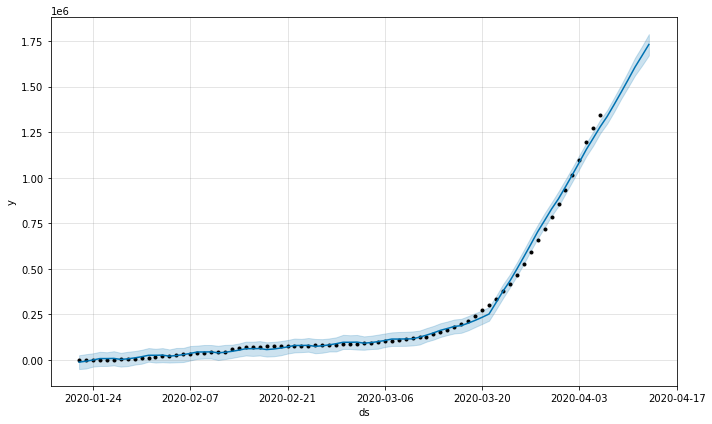

In [62]:
confirmed_case=m.plot(forecast)

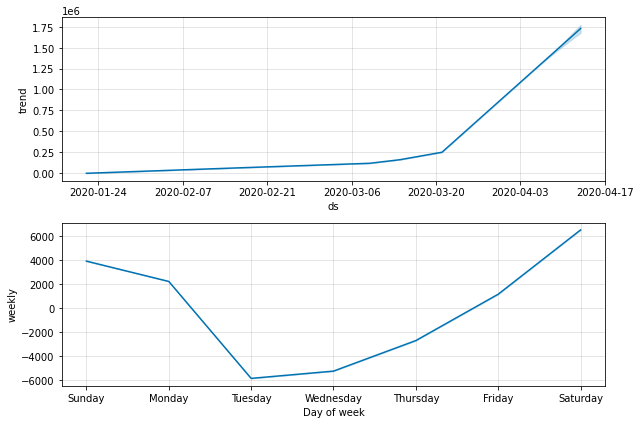

In [63]:
confirmed_case_trend=m.plot_components(forecast)

In [64]:
#Death cases
deaths1.groupby('Date').sum().tail()

,Deaths
Date,
2020-04-02,52983
2020-04-03,58787
2020-04-04,64606
2020-04-05,69374
2020-04-06,74565


In [65]:
#Deaths_case
deaths1.rename(columns={'Date':'ds', 'Deaths':'y'})

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
71,2020-04-02,52983
72,2020-04-03,58787
73,2020-04-04,64606
74,2020-04-05,69374


In [66]:
deaths1.columns=['ds','y']
deaths1['ds']=pd.to_datetime(deaths1['ds'])

In [67]:
m=Prophet(interval_width=0.95)
m.fit(deaths1)
future_deaths=m.make_future_dataframe(periods=7)
future_deaths.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12
82,2020-04-13


In [68]:
forecast_deaths=m.predict(future_deaths)
forecast_deaths[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,78387.142674,75020.922221,82016.314944
79,2020-04-10,82303.506962,78331.721084,85947.155272
80,2020-04-11,86257.962100,82698.243452,90135.674735
81,2020-04-12,89800.254744,85800.501645,93511.988413
82,2020-04-13,93446.820103,88807.802787,97832.385696


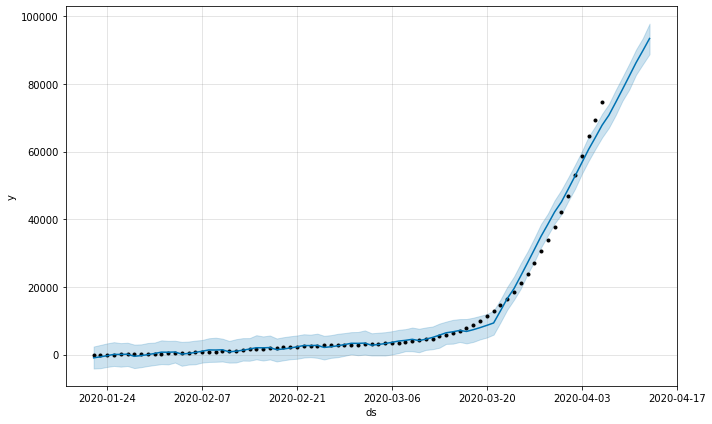

In [69]:
deaths_case=m.plot(forecast_deaths)

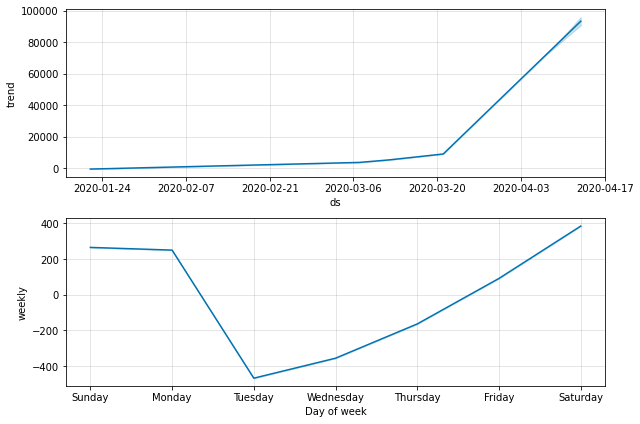

In [70]:
deaths_case_trend=m.plot_components(forecast_deaths)

In [71]:
#Recovered_cases
recovered1.groupby('Date').sum().tail()

,Recovered
Date,
2020-04-02,208528
2020-04-03,223621
2020-04-04,243572
2020-04-05,256997
2020-04-06,273256


In [72]:
recovered1.rename(columns={'Date':'ds', 'Deaths':'y'})

,ds,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
71,2020-04-02,208528
72,2020-04-03,223621
73,2020-04-04,243572
74,2020-04-05,256997


In [73]:
recovered1.columns=['ds','y']
recovered1['ds']=pd.to_datetime(recovered1['ds'])

In [74]:
m=Prophet(interval_width=0.95)
m.fit(recovered1)
future_recovered=m.make_future_dataframe(periods=7)
future_recovered.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
78,2020-04-09
79,2020-04-10
80,2020-04-11
81,2020-04-12
82,2020-04-13


In [75]:
forecast_recovered=m.predict(future_recovered)
forecast_recovered[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
78,2020-04-09,277340.653746,264393.339939,290234.125905
79,2020-04-10,287764.129204,275107.752811,301335.230925
80,2020-04-11,299069.960149,285313.345203,312576.361186
81,2020-04-12,309008.908953,295037.541723,322653.150647
82,2020-04-13,319180.675911,304475.090673,333364.256034


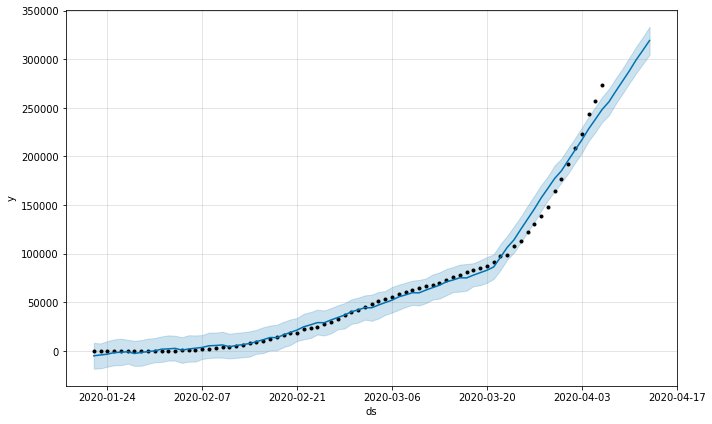

In [76]:
recovered_case=m.plot(forecast_recovered)

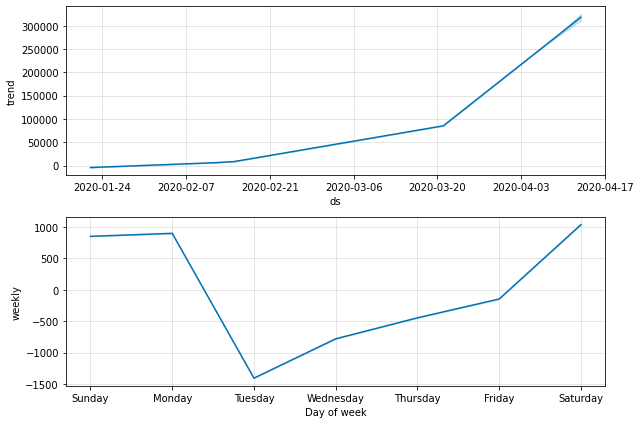

In [77]:
recovered_case_trend=m.plot_components(forecast_recovered)